In [34]:
import matplotlib.pyplot as plt
import numpy as np
import json
import re

In [35]:
def get_train_rewards(npz_files):
    x = dict()
    for npz_filename in npz_files:
        x.update(dict(np.load(npz_filename)))
    return x

In [36]:
#x = get_train_rewards(["results/rewards/rewards_orig.npz", "results/rewards/rewards5.npz", "results/rewards/rewards6.npz", "results/rewards/rewards9.npz"])

In [40]:
"""
Used to combine the data since temperature was not included in the keys
x = get_train_rewards(["results/rewards/rewards_orig.npz", "results/rewards/rewards5.npz", "results/rewards/rewards6.npz", "results/rewards/rewards9.npz"])
new_x = dict()
for key, value in x.items():
    data = json.loads(key)
    data['temperature'] = 1.0
    new_x[re.sub(r"\s", "", json.dumps(data, sort_keys=True))] = value
x = get_train_rewards(["results/rewards/rewards7.npz"])
for key, value in x.items():
    data = json.loads(key)
    data['temperature'] = 2.0
    new_x[re.sub(r"\s", "", json.dumps(data, sort_keys=True))] = value
x = get_train_rewards(["results/rewards/rewards8.npz"])
for key, value in x.items():
    data = json.loads(key)
    data['temperature'] = 0.5
    new_x[re.sub(r"\s", "", json.dumps(data, sort_keys=True))] = value
"""

In [42]:
np.savez("results/rewards/rewards_combined.npz", **new_x)

In [78]:
#x = get_train_rewards(["results/rewards/rewards_combined.npz"])
x = get_train_rewards(["rewards.npz"])

(5, 1000)


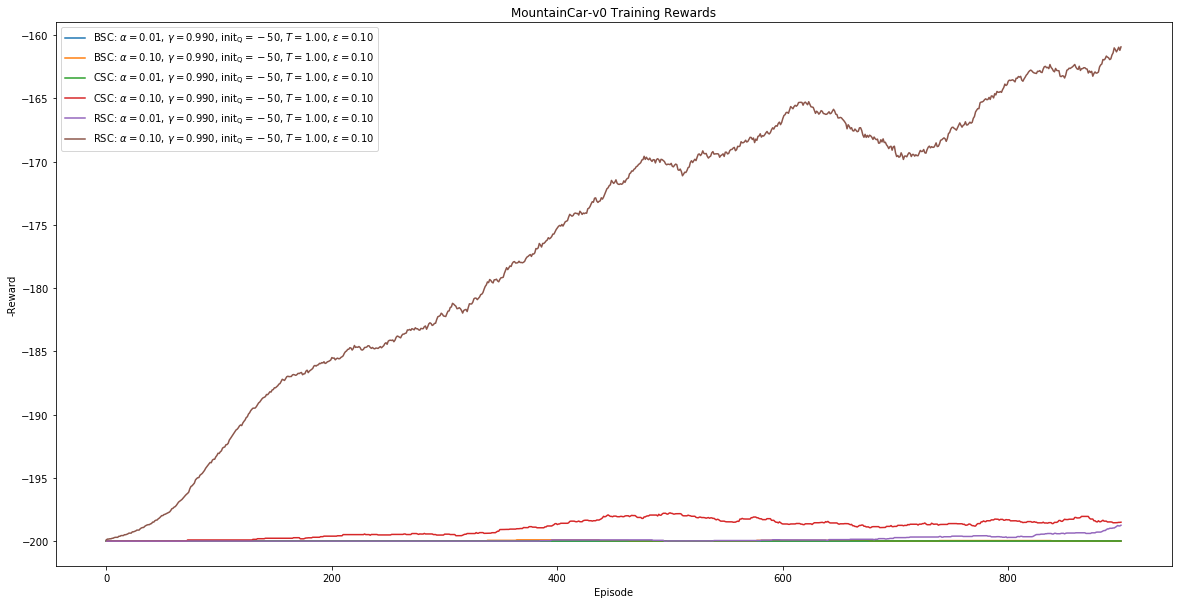

In [79]:
print(x[list(x)[0]].shape)
def moving_average(a, n):
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n
plt.figure(figsize=(20,10))
for key in x.keys():
    f = json.loads(key)
    data = np.mean(x[key], axis=0)
    #data = x[key][5, :]
    #print(x[key][:, 0])
    avg = moving_average(data, 100)
    temp = f.get('temperature') if f.get('temperature') is not None else 1
    epsilon = "" if f.get("epsilon") is None else r", $\epsilon=%.2f$"%f.get("epsilon")
    label = "%s: $\\alpha=%.2f$, $\\gamma=%.3f$, $\\mathrm{init}_{\\mathrm{Q}}=%d$, $T=%.2f$%s" % (f['agent'], f['alpha'], f['gamma'], f['init_Q'], f['temperature'], epsilon) 
    #if f['agent'] == 'R':
    plt.plot(np.arange(avg.shape[0]), avg, label=label)
plt.xlabel("Episode")

plt.ylabel("-Reward")
plt.title("%s Training Rewards" % f['environment'])
plt.legend()
plt.show()


In [77]:
test_rewards = np.load("test_rewards.npz")
bellman = test_rewards[list(test_rewards)[0]]
consistent_bellman = test_rewards[list(test_rewards)[1]]
rso = test_rewards[list(test_rewards)[2]]
for arr in [bellman, consistent_bellman, rso]:
    print(np.mean(arr, axis=1))

[-129.36 -129.56 -134.13 -151.18 -185.02]
[-126.35 -126.15 -125.4  -125.59 -128.14]
[-122.66 -120.72 -120.42 -121.35 -123.04]


In [6]:
print(data.shape)

(1000,)


In [69]:
qtable = np.load("qvalues.npz")

In [70]:
print(qtable[list(qtable.keys())[0]])

[[[-50. -50. -50.]
  [-50. -50. -50.]
  [-50. -50. -50.]
  ...
  [-50. -50. -50.]
  [-50. -50. -50.]
  [-50. -50. -50.]]

 [[-50. -50. -50.]
  [-50. -50. -50.]
  [-50. -50. -50.]
  ...
  [-50. -50. -50.]
  [-50. -50. -50.]
  [-50. -50. -50.]]

 [[-50. -50. -50.]
  [-50. -50. -50.]
  [-50. -50. -50.]
  ...
  [-50. -50. -50.]
  [-50. -50. -50.]
  [-50. -50. -50.]]

 [[-50. -50. -50.]
  [-50. -50. -50.]
  [-50. -50. -50.]
  ...
  [-50. -50. -50.]
  [-50. -50. -50.]
  [-50. -50. -50.]]

 [[-50. -50. -50.]
  [-50. -50. -50.]
  [-50. -50. -50.]
  ...
  [-50. -50. -50.]
  [-50. -50. -50.]
  [-50. -50. -50.]]]


In [ ]:
import gym
import script
env = gym.make("LunarLander-v2")
qtable = np.load("qvalues.npz")
qtable = qtable[list(qtable.keys())[0]][0]
done = False
state = env.reset()
lunar_state_space = list(range(4**6 * 4))
max_steps = 200
lunar_discretization = script.Discretization(lunar_state_space, [np.array([-np.inf, -0.5, 0, 0.5, np.inf]) for i in range(6)] + [np.array([-0.1, 0.1, 1.5]) for i in range(2)])
the_state = env.reset()
total_reward = 0
for j in range(max_steps):
    env.render()
    discrete_state = lunar_discretization(the_state)
    #action = agent.decide(discrete_state)
    action = list(range(4))[np.argmax(qtable[discrete_state, :])]   # Greedy
    next_state, reward, done, info = env.step(action)
    discrete_next_state = lunar_discretization(next_state)
    total_reward += reward
    the_state = next_state
    if done:
        break
print(total_reward)

KeyboardInterrupt: 

In [31]:
print(list(qtable.keys()))

['{"agent":"B","alpha":0.01,"environment":"MountainCar-v0","epsilon":null,"gamma":0.999,"init_Q":-50,"temperature":1}']
